In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
print(df.isnull() .sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [6]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


In [7]:
from sklearn.impute import SimpleImputer

# 2. Imputation for numerical data (using mean)
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# 3. Imputation for categorical data (using most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [8]:
print(df.isnull() .sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [14]:

ordinal_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                   'Family_Income', 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
ordinal_categories = [
    ['Low', 'Medium', 'High'],   # For Parental_Involvement
    ['Low', 'Medium', 'High'],   # For Access_to_Resources
    ['Low', 'Medium', 'High'],   # For Motivation_Level
    ['Low', 'Medium', 'High'],   # For Family_Income
    ['Low', 'Medium', 'High'],   # For Teacher_Quality
    ['High School', 'College', 'Postgraduate'],  # For Parental_Education_Level
    ['Near', 'Moderate', 'Far']  # For Distance_from_Home
]

# Define columns for One-Hot Encoding
one_hot_columns = ['Extracurricular_Activities', 'Internet_Access', 'School_Type',
                   'Peer_Influence', 'Learning_Disabilities', 'Gender']

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_columns),
        ('onehot', OneHotEncoder(drop='first'), one_hot_columns)
    ], remainder='passthrough'  # Keeps the other columns unchanged
)


df_encoded = pd.DataFrame(preprocessor.fit_transform(df))

ordinal_encoded_columns = [f"{col}_encoded" for col in ordinal_columns]
one_hot_encoded_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_columns)

remaining_columns = df.drop(columns=ordinal_columns + one_hot_columns).columns

updated_columns = ordinal_encoded_columns + list(one_hot_encoded_columns) + list(remaining_columns)

df_encoded.columns = updated_columns

df_encoded.head()

,Parental_Involvement_encoded,Access_to_Resources_encoded,Motivation_Level_encoded,Family_Income_encoded,Teacher_Quality_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,...,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,23.0,84.0,7.0,73.0,0.0,3.0,67.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,19.0,64.0,8.0,59.0,2.0,4.0,61.0
2,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,24.0,98.0,7.0,91.0,2.0,4.0,74.0
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,29.0,89.0,8.0,98.0,1.0,4.0,71.0
4,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,19.0,92.0,6.0,65.0,3.0,4.0,70.0


In [15]:
df_encoded.columns

Index(['Parental_Involvement_encoded', 'Access_to_Resources_encoded',
       'Motivation_Level_encoded', 'Family_Income_encoded',
       'Teacher_Quality_encoded', 'Parental_Education_Level_encoded',
       'Distance_from_Home_encoded', 'Extracurricular_Activities_Yes',
       'Internet_Access_Yes', 'School_Type_Public', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Learning_Disabilities_Yes', 'Gender_Male',
       'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

<Axes: >

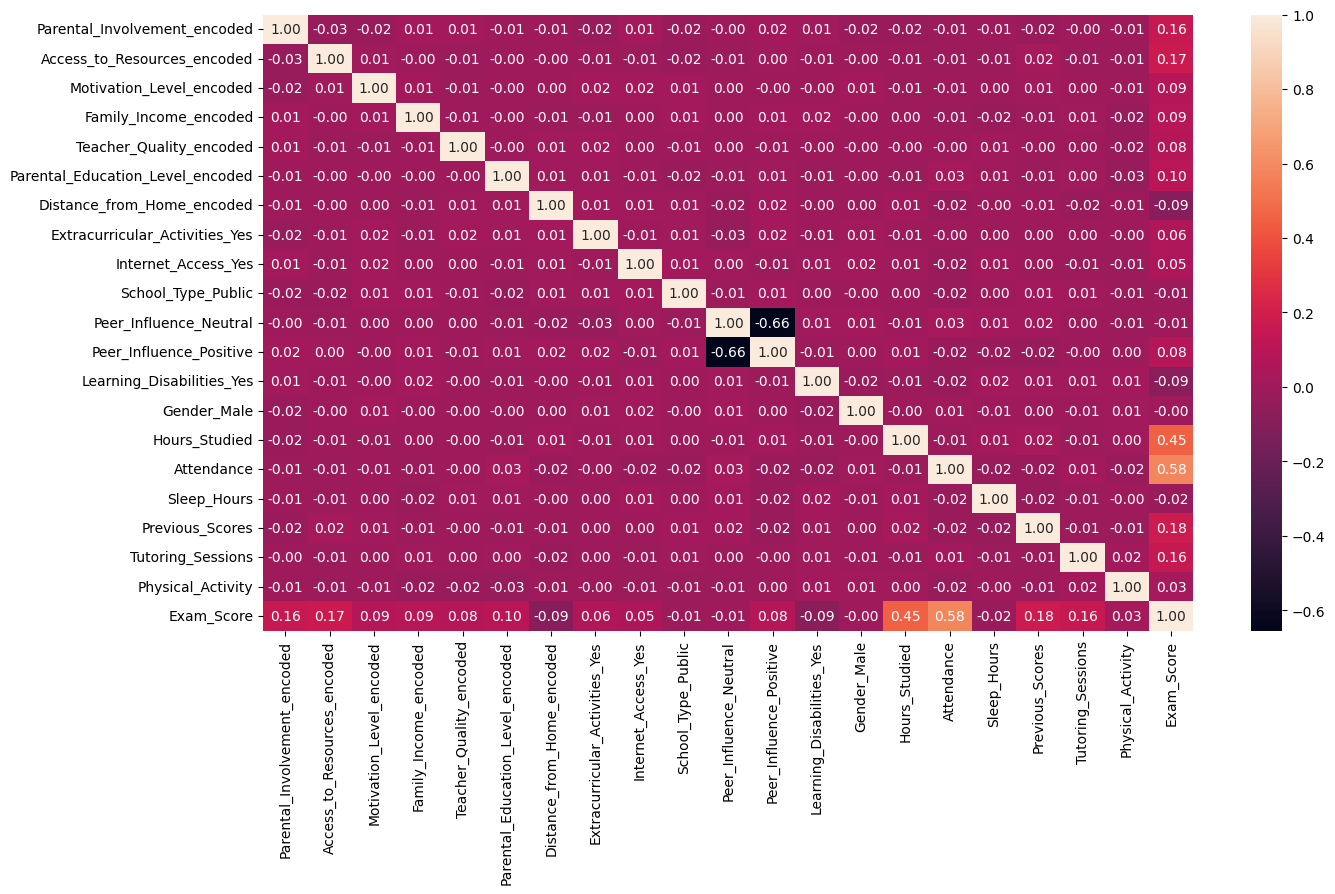

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f",)

###2. Penjelasan
- Gambar yang Anda berikan adalah matriks korelasi, yang menunjukkan hubungan antara berbagai variabel. Variabel-variabel dalam matriks ini terkait dengan kinerja akademik siswa.

- Tujuan dari visualisasi ini adalah untuk membantu memahami faktor-faktor yang terkait dengan kinerja akademik siswa. Pengguna dari visualisasi ini dapat berupa guru, peneliti, atau administrator yang tertarik untuk meningkatkan hasil belajar siswa.

- Fungsi dari visualisasi ini adalah untuk mengidentifikasi variabel-variabel yang berkorelasi paling kuat dengan kinerja akademik siswa. Informasi ini dapat digunakan untuk mengembangkan intervensi yang menargetkan variabel-variabel ini.

- Tone dari visualisasi ini adalah netral. Visualisasi ini tidak membuat penilaian tentang pentingnya variabel yang berbeda.
